# Depth vs Width in MLPs: Experiments on Representational Power

This notebook explores how the depth (number of hidden layers) and 
width (number of neurons per layer) of a Multilayer Perceptron affect 
its ability to learn complex functions.

We use:
- A 2D synthetic dataset (`make_moons`)
- Several MLP architectures
- Decision boundary visualisation
- Train/Test accuracy comparisons

Colour-blind-friendly palettes are used.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Use colorblind-friendly palette
sns.set_palette("colorblind")

# Reproducibility
RANDOM_STATE = 42

# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.25, random_state=RANDOM_STATE)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Decision Boundary Plotting Function
The helper below allows us to visualise how each MLP architecture 
shapes the classification space.


In [3]:
def plot_decision_boundary(model, X, y, ax, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=20)
    ax.set_title(title)


# Experiment 1: Effect of Depth (Width constant at 20 neurons)

We test:
- (20,)
- (20, 20)
- (20, 20, 20)
- (20, 20, 20, 20)


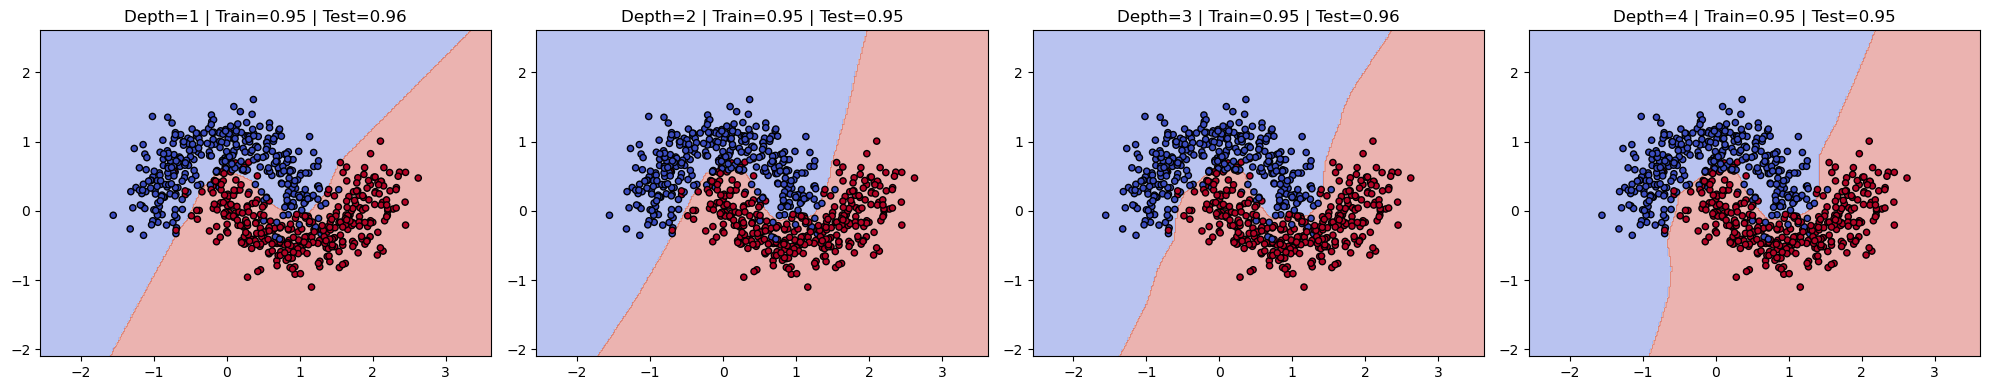

[{'architecture': (20,),
  'train_acc': 0.9471428571428572,
  'test_acc': 0.9566666666666667},
 {'architecture': (20, 20),
  'train_acc': 0.9514285714285714,
  'test_acc': 0.9466666666666667},
 {'architecture': (20, 20, 20),
  'train_acc': 0.95,
  'test_acc': 0.9566666666666667},
 {'architecture': (20, 20, 20, 20),
  'train_acc': 0.9542857142857143,
  'test_acc': 0.95}]

In [4]:
depth_architectures = [
    (20,),
    (20, 20),
    (20, 20, 20),
    (20, 20, 20, 20)
]

fig, axes = plt.subplots(1, len(depth_architectures), figsize=(20, 4))

depth_results = []

for ax, arch in zip(axes, depth_architectures):
    clf = MLPClassifier(
        hidden_layer_sizes=arch,
        activation="relu",
        solver="adam",
        max_iter=2000,
        random_state=RANDOM_STATE
    )
    clf.fit(X_train_scaled, y_train)

    # Accuracy
    train_acc = accuracy_score(y_train, clf.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, clf.predict(X_test_scaled))

    depth_results.append(
        {"architecture": arch, "train_acc": train_acc, "test_acc": test_acc}
    )

    title = f"Depth={len(arch)} | Train={train_acc:.2f} | Test={test_acc:.2f}"
    plot_decision_boundary(clf, X_train, y_train, ax, title=title)

plt.tight_layout()
plt.show()

depth_results


# Accuracy Table for Depth Experiment


In [6]:
import pandas as pd
depth_df = pd.DataFrame(depth_results)
depth_df


,architecture,train_acc,test_acc
0,"(20,)",0.947143,0.956667
1,"(20, 20)",0.951429,0.946667
2,"(20, 20, 20)",0.950000,0.956667
3,"(20, 20, 20, 20)",0.954286,0.950000


# Experiment 2: Effect of Width (Depth constant at 2 layers)

We test:
- (5,5)
- (20,20)
- (50,50)
- (100,100)


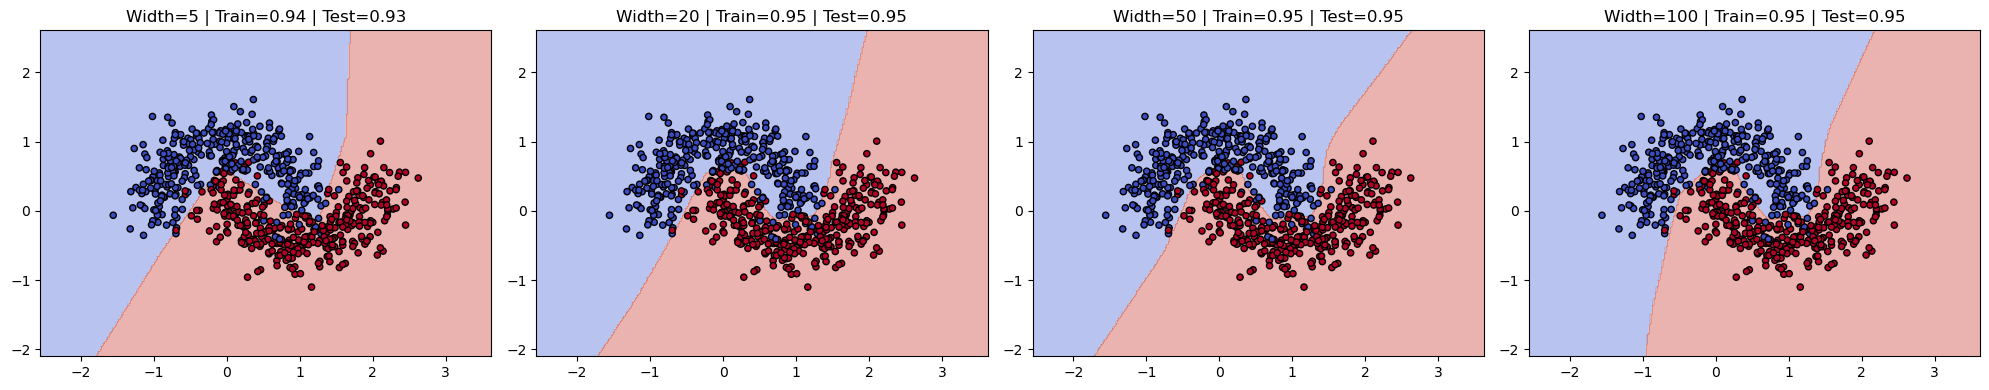

[{'architecture': (5, 5),
  'train_acc': 0.9385714285714286,
  'test_acc': 0.9333333333333333},
 {'architecture': (20, 20),
  'train_acc': 0.9514285714285714,
  'test_acc': 0.9466666666666667},
 {'architecture': (50, 50), 'train_acc': 0.9514285714285714, 'test_acc': 0.95},
 {'architecture': (100, 100),
  'train_acc': 0.9528571428571428,
  'test_acc': 0.95}]

In [7]:
width_architectures = [
    (5, 5),
    (20, 20),
    (50, 50),
    (100, 100)
]

fig, axes = plt.subplots(1, len(width_architectures), figsize=(20, 4))

width_results = []

for ax, arch in zip(axes, width_architectures):
    clf = MLPClassifier(
        hidden_layer_sizes=arch,
        activation="relu",
        solver="adam",
        max_iter=2000,
        random_state=RANDOM_STATE
    )
    clf.fit(X_train_scaled, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, clf.predict(X_test_scaled))

    width_results.append(
        {"architecture": arch, "train_acc": train_acc, "test_acc": test_acc}
    )

    title = f"Width={arch[0]} | Train={train_acc:.2f} | Test={test_acc:.2f}"
    plot_decision_boundary(clf, X_train, y_train, ax, title=title)

plt.tight_layout()
plt.show()

width_results


# Accuracy Table for Width Experiment


In [8]:
width_df = pd.DataFrame(width_results)
width_df


,architecture,train_acc,test_acc
0,"(5, 5)",0.938571,0.933333
1,"(20, 20)",0.951429,0.946667
2,"(50, 50)",0.951429,0.950000
3,"(100, 100)",0.952857,0.950000


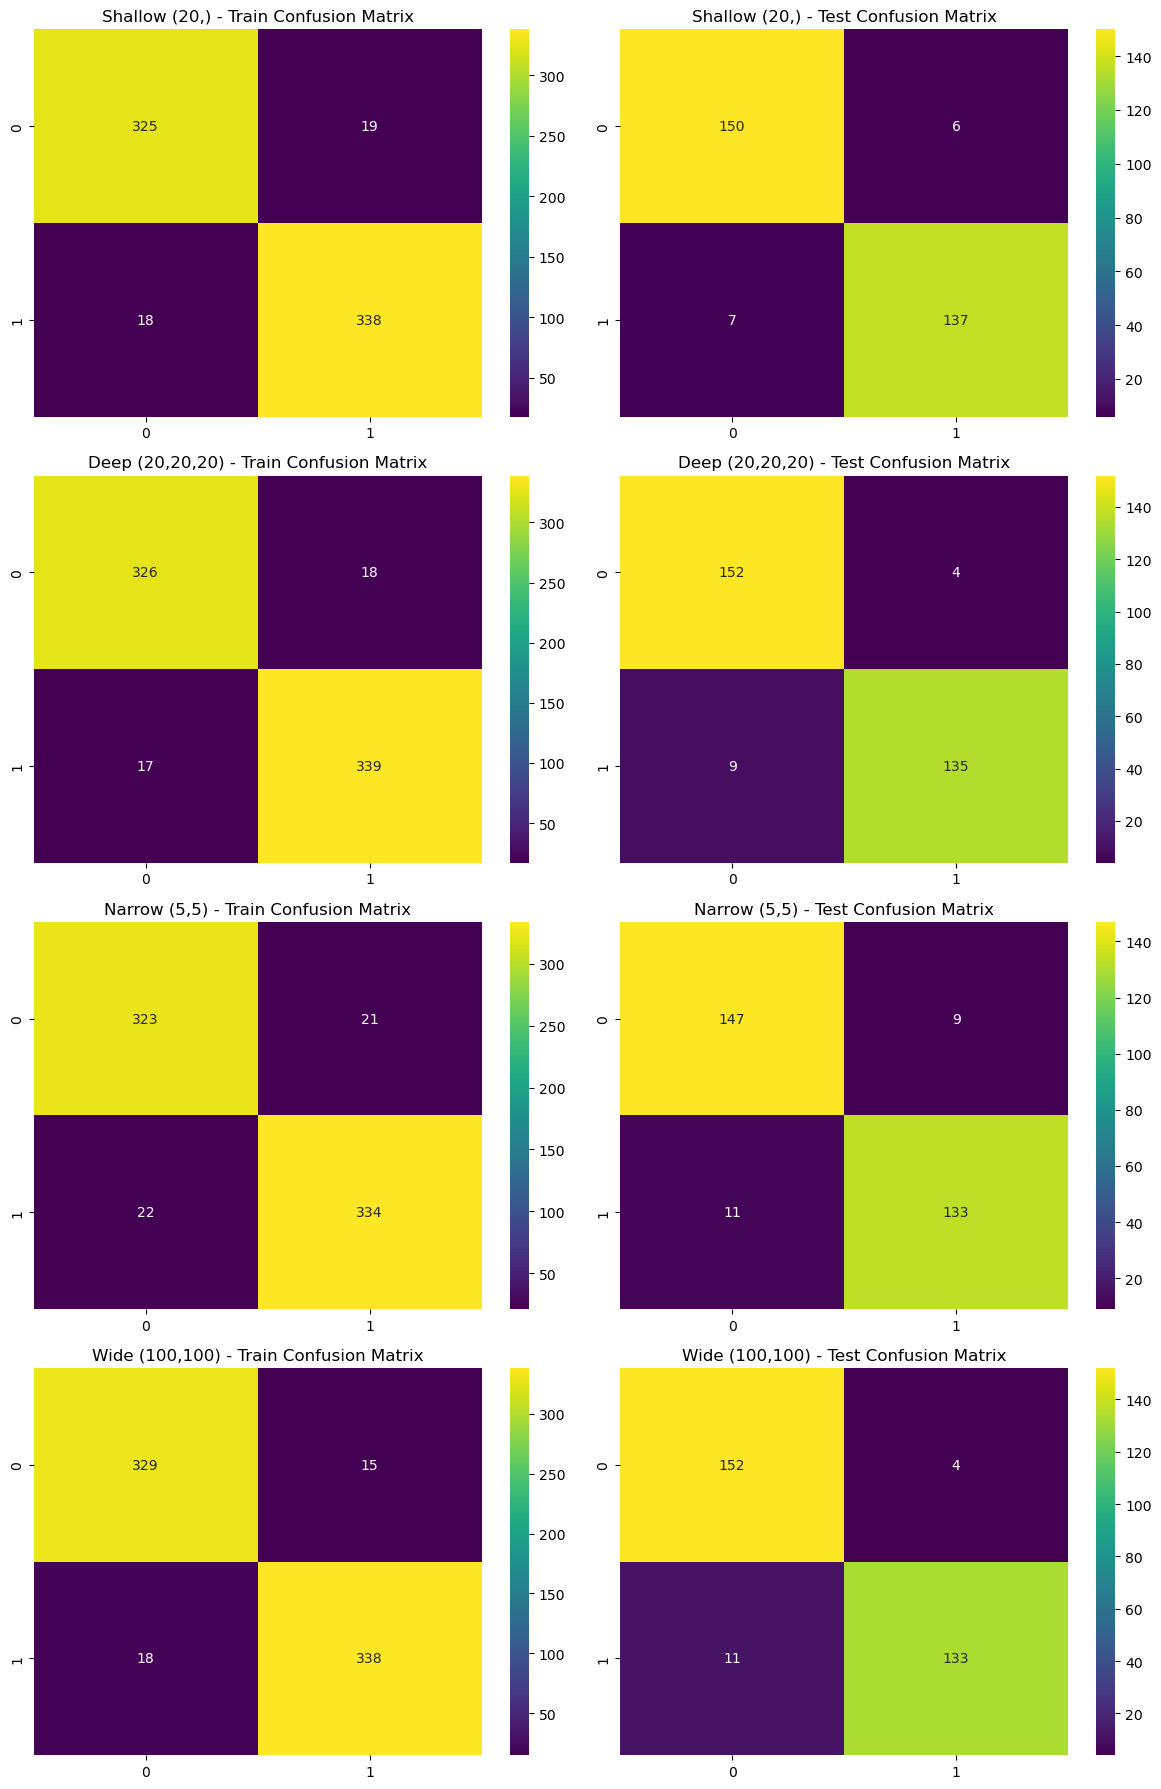

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

architectures_to_compare = {
    "Shallow (20,)": (20,),
    "Deep (20,20,20)": (20, 20, 20),
    "Narrow (5,5)": (5, 5),
    "Wide (100,100)": (100, 100)
}

fig, axes = plt.subplots(4, 2, figsize=(12, 18))

results_conf = {}

for idx, (name, arch) in enumerate(architectures_to_compare.items()):
    clf = MLPClassifier(
        hidden_layer_sizes=arch,
        activation="relu",
        solver="adam",
        max_iter=2000,
        random_state=RANDOM_STATE
    )
    clf.fit(X_train_scaled, y_train)
    
    y_train_pred = clf.predict(X_train_scaled)
    y_test_pred = clf.predict(X_test_scaled)
    
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    
    results_conf[name] = {
        "train_cm": train_cm,
        "test_cm": test_cm
    }
    
    # Plot train confusion matrix
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="viridis", ax=axes[idx, 0])
    axes[idx, 0].set_title(f"{name} - Train Confusion Matrix")
    
    # Plot test confusion matrix
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="viridis", ax=axes[idx, 1])
    axes[idx, 1].set_title(f"{name} - Test Confusion Matrix")

plt.tight_layout()
plt.show()
